<a href="https://colab.research.google.com/github/abcr5914/Projects_Private/blob/main/Project_Compressor_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

The code is divided into several sections to help you simulate the process of filling a bottle with air. Follow these instructions to use it correctly.

## Code Blocks 1 to 4: Initialization
These blocks set up the necessary parameters, constants, and formulas required for all calculations.  
**You must run these blocks first** before proceeding to the main sections.

---

## Main Sections: Choose ONE at a Time
The code provides three different approaches to solve the problem. Each section is **independent**, so run only one of them at a time.

### 1. Rough Estimate
This section gives a quick, approximate calculation of the time required to fill the bottle.  
- It is based on simplified assumptions.  
- Use this to get a basic understanding of the problem.

### 2. Adiabatic Process
In this section, the process assumes no heat exchange between the bottle and its surroundings (**adiabatic process**).  
- It calculates how the pressure and temperature in the bottle change due to compression heating alone.  

### 3. Non-Adiabatic Process
This section includes heat transfer between the bottle and the surroundings, making it more realistic.  
- It accounts for cooling as the bottle loses heat during the filling process.  
- Use this for a detailed and accurate simulation.

---

## How to Use
1. Run **Code Blocks 1 to 4** to initialize the variables and constants.
2. Select **one** of the main sections:  
   - Rough Estimate  
   - Adiabatic Process  
   - Non-Adiabatic Process  
3. Run the selected section to see the results.

By following this structure, you can explore the problem starting with a simple estimation and progressing to more complex and realistic calculations.


## **Initialization**

In [1]:
# Imports
import math
import matplotlib.pyplot as plt

In [2]:
# Constants
R = 287  # Specific gas constant for air (J/kg·K)
n = 1.4  # Polytropic index (isentropic process)
k = 25  # Heat transmission coefficient (W/m^2) (not used unless specified)
T_ambient = 293.15  # Ambient temperature (K)
P_ambient = 1e5  # Ambient pressure (Pa) ( = 1 Bar)

# Compressor and bottle parameters
D = 0.12  # Diameter of compressor cylinder (m)
h = 0.10  # Height of compressor cylinder (m)
CR = 23  # Compression ratio
RPM = 1000  # Revolutions per minute
V_bottle = 6  # Volume of the bottle (m^3)
P_bottle_start = 2e5  # Starting pressure in the bottle (Pa)
T_bottle_start = 293.15  # Starting temperature in the bottle (K)
P_bottle_final = 30e5  # Final pressure in the bottle (Pa)

# Derived values
N = RPM / 60  # Compressor revolutions per second
time_step = 1 / N  # Time for one revolution (seconds)
print(f'For each revolution, it takes {time_step:.4f} seconds.')

V_s = round(math.pi * (D / 2)**2 * h, 8) # Swept volume of the compressor (m^3)

For each revolution, it takes 0.0600 seconds.


In [3]:
# Visualization

# Arrays for plotting
def initiate_plot():
  time_list = []
  pressure_list = []
  temperature_list = []
  mass_list = []
  return time_list, pressure_list, mass_list, temperature_list

In [4]:
# Define the visualization function
def plot_bottle_data(time_list, pressure_list, temperature_list, mass_list):
    """
    Plots the evolution of pressure, temperature, and mass over time
    and the relationship between pressure/temperature and mass.

    Parameters:
        time_list (list): List of time values.
        pressure_list (list): List of pressure values (in bar).
        temperature_list (list): List of temperature values (in Kelvin).
        mass_list (list): List of mass values (in kg).
    """
    # Plotting against the increase in time of filling the bottle
    plt.figure(figsize=(12, 6))

    # Pressure Plot
    plt.subplot(1, 3, 1)
    plt.plot(time_list, pressure_list, label="Pressure (bar)", color="blue")
    plt.xlabel("Time (s)")
    plt.ylabel("Pressure (bar)")
    plt.title("Pressure vs Time")
    plt.grid()
    plt.legend()

    # Temperature Plot
    plt.subplot(1, 3, 2)
    plt.plot(time_list, temperature_list, label="Temperature (K)", color="red")
    plt.xlabel("Time (s)")
    plt.ylabel("Temperature (K)")
    plt.title("Temperature vs Time")
    plt.grid()
    plt.legend()

    # Mass Plot
    plt.subplot(1, 3, 3)
    plt.plot(time_list, mass_list, label="Mass (kg)", color="green")
    plt.xlabel("Time (s)")
    plt.ylabel("Mass (kg)")
    plt.title("Mass vs Time")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plotting against the increase in bottle's mass
    plt.figure(figsize=(12, 6))

    # Pressure Plot
    plt.subplot(1, 2, 1)
    plt.plot(mass_list, pressure_list, label="Pressure (bar)", color="blue")
    plt.xlabel("Mass (kg)")
    plt.ylabel("Pressure (bar)")
    plt.title("Pressure vs Mass")
    plt.grid()
    plt.legend()

    # Temperature Plot
    plt.subplot(1, 2, 2)
    plt.plot(mass_list, temperature_list, label="Temperature (K)", color="red")
    plt.xlabel("Mass (kg)")
    plt.ylabel("Temperature (K)")
    plt.title("Temperature vs Mass")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

## **Rough Estimate Calculation :** To be used as a guide

In [8]:
# Rough Estimate Calculation: To be used as a guide

# Calculate Air Intake Volume per Minute
Q_intake = round(V_s * RPM * CR , 6)
print('Air Intake Volume per Minute =', Q_intake)

# Calculate Density of Air at Ambient Conditions
density_Air = round(P_ambient / (R * T_ambient), 4)
print('Density of Air =', density_Air)

# Calculate Mass flow Rate
mass_flow_rate = round(density_Air * Q_intake, 2)
print('Mass Flow Rate =', mass_flow_rate)

# Calculate Final Temparature
T_bottle_final = round(T_bottle_start * ((P_bottle_final / P_bottle_start) ** (round(n-1,2) / n)), 2)
print('Final Temperature =', T_bottle_final, 'K')

# Calculate Average Temparature T_avg
T_bottle_avg = round((T_bottle_start + T_bottle_final) / 2 , 2)
print('Average Temperature =', T_bottle_avg, 'K')

# Calculate Time
Time_taken = round((V_bottle * (P_bottle_final - P_bottle_start)) / (mass_flow_rate * R * T_bottle_avg) , 2)

# Output the results
print(f"Time to fill the bottle to {P_bottle_final / 1e5:.1f} bar: {Time_taken} minutes")

Air Intake Volume per Minute = 26.01231
Density of Air = 1.1886
Mass Flow Rate = 30.92
Final Temperature = 635.5 K
Average Temperature = 464.32 K
Time to fill the bottle to 30.0 bar: 4.08 minutes


## The process is considered **Adiabatic process**, acc to the problem

In [9]:
time_list, pressure_list, mass_list, temperature_list = initiate_plot() # necessary for plotting

# Initialize variables
P_bottle = P_bottle_start  # Initial pressure in the bottle (Pa)
T_bottle = T_bottle_start  # Initial temperature in the bottle (K)
m_bottle = (P_bottle * V_bottle) / (R * T_bottle)  # Initial mass of air in the bottle (kg)
time_elapsed = 0  # Total elapsed time (seconds)

# Maximum cylinder pressure based on compression ratio and ambient pressure
P_cylinder_max = P_ambient * (CR**n)

# Simulation loop: Continue until the bottle reaches the desired pressure
while P_bottle < P_bottle_final:
    # Calculate the air mass delivered in this cycle
    delta_m = (P_cylinder_max - P_bottle) * V_s / (R * T_bottle)

    # Ensure no reverse flow occurs (delta_m should never be negative)
    if delta_m < 0:
        delta_m = 0

    # Update the mass of air in the bottle
    m_bottle += delta_m

    # Store the current pressure before updating it (for temperature calculation)
    P_bottle_old = P_bottle

    # Update the pressure in the bottle using the ideal gas law
    P_bottle = (m_bottle * R * T_bottle) / V_bottle

    # Update the temperature in the bottle assuming an adiabatic process
    T_bottle *= (P_bottle / P_bottle_old)**((n - 1) / n)

    # Update the total time elapsed
    time_elapsed += time_step

    # Store data for visualization
    time_list.append(time_elapsed)
    pressure_list.append(P_bottle / 1e5)  # Convert pressure to bar for better readability
    temperature_list.append(T_bottle)
    mass_list.append(m_bottle)

# Output the final result
print(f"Time to fill the bottle to {P_bottle_final / 1e5:.1f} bar: {time_elapsed / 60:.2f} minutes")


Time to fill the bottle to 30.0 bar: 1.67 minutes


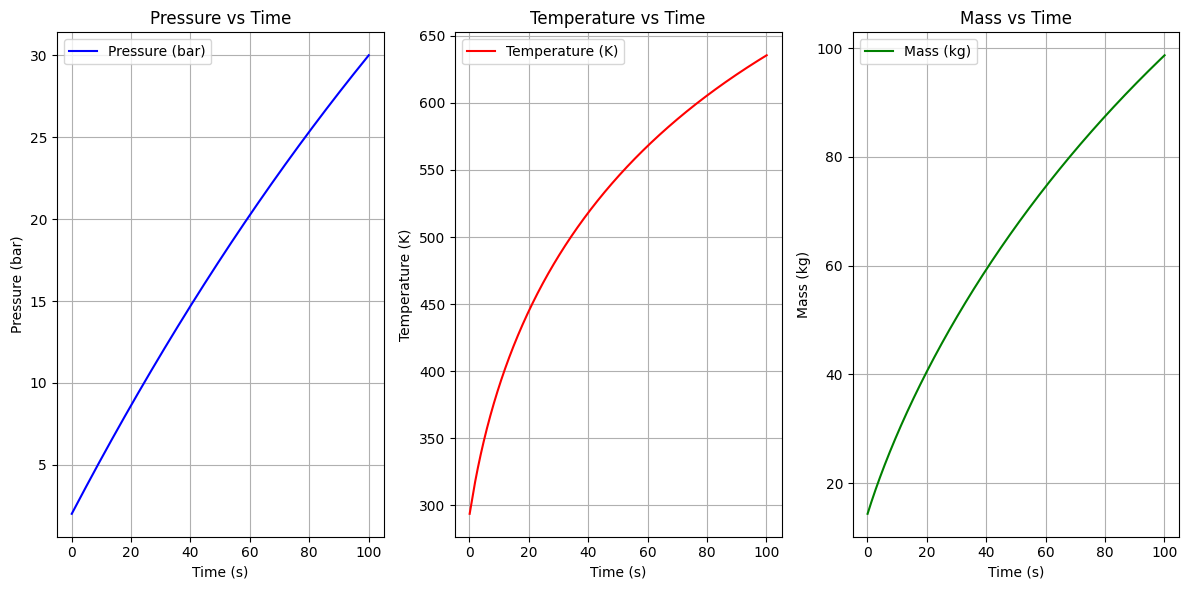

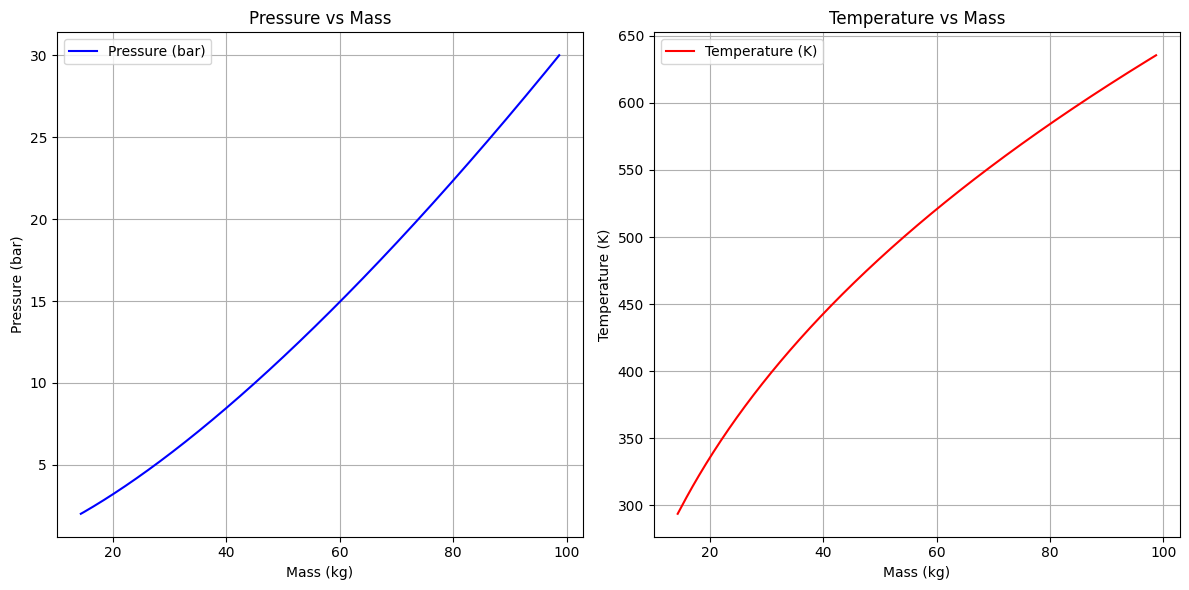

In [10]:
plot_bottle_data(time_list, pressure_list, temperature_list, mass_list)

##**Non adiabatic process** : not specified according to the problem, but considering it as heat transfer coefficient is provided.

In [6]:
# So this step is not required but i will try anyway just because "heat transfer coeffient(k)" is provided

# To do this step, we will need surface area of the bottle, so we will take height(h) = 2 * radius(r),
# \this relation is assumed and not provided within the problem statement.

time_list, pressure_list, mass_list, temperature_list = initiate_plot() # necessary for plotting

# Calculate the radius and surface area of the bottle
r_bottle = (V_bottle / (2 * math.pi))**(1/3)  # Radius of the bottle (m)
h_bottle = 2 * r_bottle  # Height of the bottle (m)
surface_area_bottle = 6 * math.pi * r_bottle**2  # Approximate surface area of the bottle (m²)

# Output bottle dimensions for verification
print(f"Radius of the bottle: {r_bottle:.3f} m")
print(f"Height of the bottle: {h_bottle:.3f} m")
print(f"Surface area of the bottle: {surface_area_bottle:.3f} m²")

# Initialize variables
P_bottle = P_bottle_start  # Initial pressure in the bottle (Pa)
T_bottle = T_bottle_start  # Initial temperature in the bottle (K)
m_bottle = (P_bottle * V_bottle) / (R * T_bottle)  # Initial mass of air in the bottle (kg)
time_elapsed = 0  # Total elapsed time (s)

# Pre-calculate the maximum pressure the cylinder can generate
P_cylinder_max = P_ambient * (CR**n)

# Simulation loop: Calculate pressure, temperature, and time until the target pressure is reached
while P_bottle < P_bottle_final:
    # Calculate the air mass delivered during this cycle
    delta_m = (P_cylinder_max - P_bottle) * V_s / (R * T_bottle)

    # Ensure no reverse flow (delta_m should never be negative)
    if delta_m < 0:
        delta_m = 0

    # Update the mass of air in the bottle
    m_bottle += delta_m

    # Store the previous pressure for temperature calculations
    P_bottle_old = P_bottle

    # Update the pressure in the bottle
    P_bottle = (m_bottle * R * T_bottle) / V_bottle

    # Account for compression heating (adiabatic process)
    T_bottle_compression = T_bottle * (P_bottle / P_bottle_old)**((n - 1) / n)

    # Calculate heat transfer (non-adiabatic correction)
    Q = k * surface_area_bottle * (T_bottle_compression - T_ambient) * time_step  # Heat transferred (J)
    delta_T_heat_transfer = -Q / (m_bottle * 717.6)  # Change in temperature due to heat transfer
    T_bottle = T_bottle_compression + delta_T_heat_transfer

    # Update the total elapsed time
    time_elapsed += time_step

    # Store data for visualization (optional)
    time_list.append(time_elapsed)
    pressure_list.append(P_bottle / 1e5)  # Convert pressure to bar for readability
    temperature_list.append(T_bottle)
    mass_list.append(m_bottle)

# Output the final result
print(f"Time to fill the bottle to {P_bottle_final / 1e5:.1f} bar: {time_elapsed / 60:.2f} minutes")


Radius of the bottle: 0.985 m
Height of the bottle: 1.969 m
Surface area of the bottle: 18.279 m²
Time to fill the bottle to 30.0 bar: 2.13 minutes


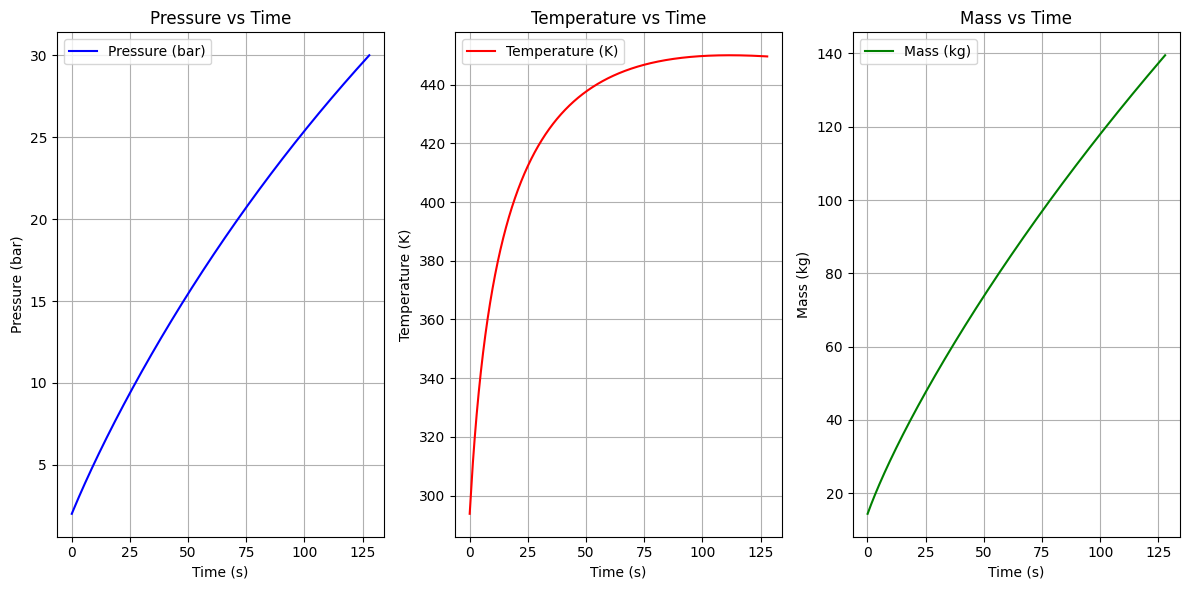

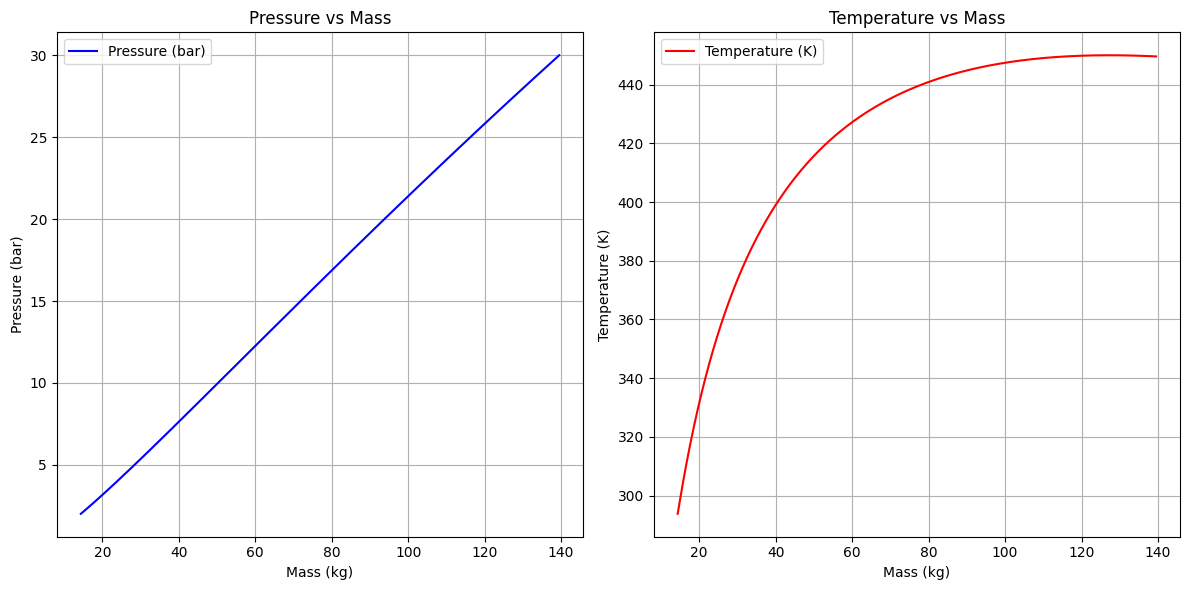

In [7]:
plot_bottle_data(time_list, pressure_list, temperature_list, mass_list)